<a href="https://colab.research.google.com/github/doricardo/analyse-race/blob/master/race_analysis_alagoas_2017_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Resultados Corrida

1.   Importação dos resultados
2.   Limpeza dos dados
3.   Média Swim, Bike, Run por categoria
4.   Melhores Splits Swim, Bike, Run por categoria
5.   Quantidade de Atleats por Categoria
6.   Percentual de Sub10 geral
7.   Percentual de Sub10 por categoria amadora

In [0]:
import numpy as np
import pandas as pd

missing_values = ['--:--:--']
df_2017 = pd.read_csv('http://doricardo.com/resultados/ResultadosCompletos/2017-alagoas70.3-all-athletes.csv', na_values = missing_values, encoding = 'cp1252')
df_2018 = pd.read_csv('http://doricardo.com/resultados/ResultadosCompletos/2018-alagoas70.3-all-athletes.csv', na_values = missing_values, encoding = 'cp1252')
df_2019 = pd.read_csv('http://doricardo.com/resultados/ResultadosCompletos/2019-alagoas70.3-all-athletes.csv', na_values = missing_values, encoding = 'cp1252')
target = '05'
#continent = pd.read_csv('http://doricardo.com/dataframe/country-and-continent.csv')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

In [0]:
def limpar_titulo(dataframe):
    dataframe.drop(['Pos'])   
    
def recuperar_media(df, categoria, sexo, atividade):
    tempos = pd.to_datetime(df[(df.Categ == categoria) & (df.Sexo == sexo) & (df[atividade].notnull())][atividade], format= '%H:%M:%S').astype(int).mean()
    media = pd.to_datetime(tempos, format= '%Y-%m-%d %H:%M:%S')
    return pd.to_datetime(media, format= '%Y-%m-%d %H:%M:%S')
  
def graficos_barra(dataframe, coluna1, coluna2, direcao):

  if direcao == 'h':
    hist1 = resultados.groupby([coluna1,coluna2]).Bib.count().sort_index(ascending=True).unstack().plot.barh(rot=0, colors=colors, title='"Ironman Alagoas - 3 anos')
  else:
    hist1 = resultados.groupby([coluna1,coluna2]).Bib.count().sort_index(ascending=True).unstack().plot.bar(rot=0, colors=colors, title='"Ironman Alagoas - 3 anos')
  
  rects = hist1.patches

  # Make labels
  labels = [ i for i in resultados.groupby([coluna2,coluna1]).Bib.count().sort_index(ascending=True) ]

  for rect, label in zip(rects, labels):
      height = rect.get_height()
      hist1.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom')

  hist1.patch.set_facecolor('#FFFFFF');

In [0]:
df_2017['Ano'] = '2017'
df_2018['Ano'] = '2018'
df_2019['Ano'] = '2019'

In [0]:
df_2017 = df_2017.drop_duplicates()
df_2018 = df_2018.drop_duplicates()
df_2019 = df_2019.drop_duplicates()

In [0]:
resultados = pd.concat([df_2017, df_2018, df_2019], sort=False)

In [0]:
resultados.head()

,Bib,Pos,Nome,Pais,Categ,Pos Categ,Swim,Bike,Run,Total,Status,Sexo,Ano
0,25,79,PAULA PONTE MOREIRA,BRA,18-24,1,00:29:55,02:23:46,01:42:58,04:40:40,Finish,F,2017
1,23,556,JESSICA MORAL,BRA,18-24,2,00:38:41,02:59:03,02:02:33,05:46:07,Finish,F,2017
2,22,782,YASMIN EVANGELISTA,BRA,18-24,3,00:47:08,03:34:13,02:21:08,06:51:46,Finish,F,2017
3,24,804,THAIS LOPES HENRIQUES,BRA,18-24,4,00:46:06,03:32:44,02:35:01,07:03:40,Finish,F,2017
4,Bib,Pos,Nome,Pais,Categ,Pos Categ,Swim,Bike,Run,Total,Status,Sexo,2017


In [0]:
# Limpar nome Colunas duplicadas
resultados = resultados[resultados.Pos != 'Pos']

# Incluir nome Colunas
resultados.columns = ['Bib', 'Pos', 'Nome', 'Pais', 'Categ', 'PosCateg', 'Swim', 'Bike', 'Run', 'Total', 'Status', 'Sexo', 'Ano']

In [0]:
resultados['Finished'] = resultados['Status']

In [0]:
resultados.loc[resultados.Status != 'Finish', 'Finished'] = 'No'
resultados.loc[resultados.Status == 'Finish', 'Finished'] = 'Yes'

In [0]:
finished = resultados[resultados.Status == 'Finish']
unfinished = resultados[resultados.Status != 'Finish']

In [0]:
finished.Swim.fillna(pd.to_datetime(pd.to_datetime(finished['Swim'],format= '%H:%M:%S').astype(int).median(), format= '%Y-%m-%d %H:%M:%S').strftime('%H:%M:%S'), inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
finished.Bike.fillna(pd.to_datetime(pd.to_datetime(finished['Bike'],format= '%H:%M:%S').astype(int).median(), format= '%Y-%m-%d %H:%M:%S').strftime('%H:%M:%S'), inplace=True)

In [0]:
finished.Run.fillna(pd.to_datetime(pd.to_datetime(finished['Run'],format= '%H:%M:%S').astype(int).median(), format= '%Y-%m-%d %H:%M:%S').strftime('%H:%M:%S'), inplace=True)

In [0]:
finished.loc[finished.Total < '05:00:00'].head()

,Bib,Pos,Nome,Pais,Categ,PosCateg,Swim,Bike,Run,Total,Status,Sexo,Ano,Finished
0,25,79,PAULA PONTE MOREIRA,BRA,18-24,1,00:29:55,02:23:46,01:42:58,04:40:40,Finish,F,2017,Yes
5,20,5,RAFAEL MARGUERITO CORAZZA,BRA,18-24,1,00:28:00,02:19:43,01:23:05,04:13:55,Finish,M,2017,Yes
6,12,105,VICTOR BOLONHA,BRA,18-24,2,00:33:04,02:21:05,01:47:49,04:45:59,Finish,M,2017,Yes
7,15,124,AUGUSTO GOMES,BRA,18-24,3,00:31:08,02:26:17,01:46:00,04:48:22,Finish,M,2017,Yes
8,14,149,DAVI FROTA,BRA,18-24,4,00:32:23,02:32:50,01:41:44,04:52:07,Finish,M,2017,Yes


In [0]:
resultados['Bib'] = resultados['Bib'].astype(int)

/usr/local/lib/python2.7/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


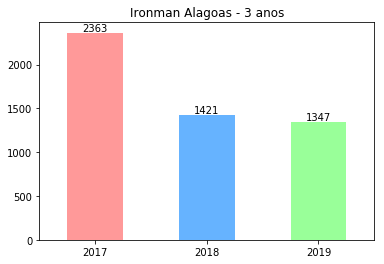

In [0]:
hist = resultados['Ano'].value_counts().sort_index(ascending=True).plot.bar(rot=0, colors=colors, title="Ironman Alagoas - 3 anos" )

rects = hist.patches

# Make labels
labels = [ i for i in resultados['Ano'].value_counts().sort_index(ascending=True) ]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    hist.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom')

hist.patch.set_facecolor('#FFFFFF');

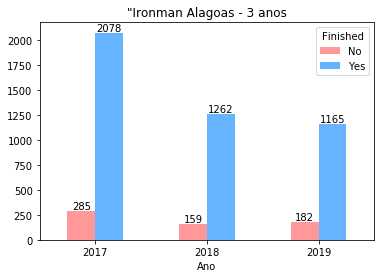

In [0]:
graficos_barra(resultados, 'Ano', 'Finished', 'v')

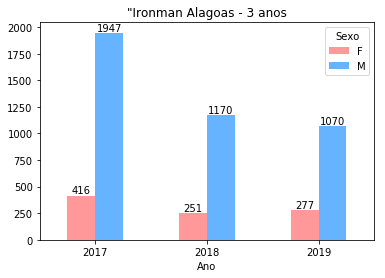

In [0]:
graficos_barra(resultados, 'Ano', 'Sexo', 'v')

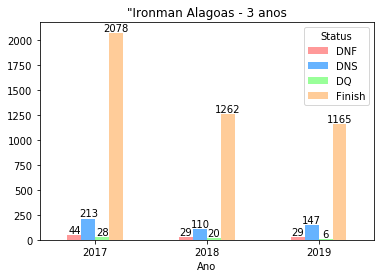

In [0]:
graficos_barra(resultados, 'Ano', 'Status', 'v')

In [0]:
resultados.groupby(['Ano', 'Finished']).Bib.count().sort_index(ascending=True)

Ano   Finished
2017  No           285
      Yes         2078
2018  No           159
      Yes         1262
2019  No           182
      Yes         1165
Name: Bib, dtype: int64

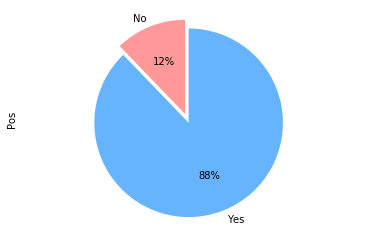

In [0]:
# Percentual de atletas que Concluiram a prova
resultados.groupby(['Finished']).Pos.count().plot.pie(title='', colors=colors, shadow=False, explode=[0.1, 0], startangle=90, autopct='%1.0f%%').axis('equal');

In [0]:
# Distribuição dos motivos de não conlusão da prova
#unfinished.groupby(['Status']).Pos.count().plot.pie(title='', colors=colors, shadow=True, explode=[0, 0.1], startangle=90, autopct='%1.0f%%').axis('equal');

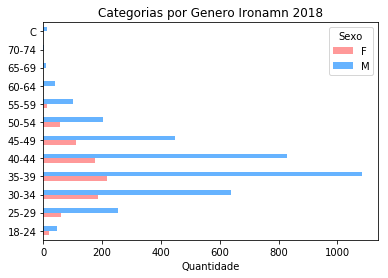

In [0]:
hist = finished.groupby(['Categ','Sexo']).Pos.count().unstack().plot.barh(rot = 0, title='Categorias por Genero Ironamn 2018', color=colors)
hist.set_ylabel('')
hist.set_xlabel('Quantidade');

In [0]:
finished['hora'] = np.where(finished.Total.str.slice(0, 2) < target, 'Abaixo' + target, 'Acima' + target)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
#finished.groupby(['hora']).Pos.count().plot.pie(title='', colors=colors, shadow=False, startangle=90, explode=[0.1, 0], autopct='%1.0f%%').axis('equal');

##Converter Colunas

In [0]:
resultados['Swim'] = pd.to_datetime(resultados['Swim'],format= '%H:%M:%S')
resultados['Bike'] = pd.to_datetime(resultados['Bike'],format= '%H:%M:%S')
resultados['Run'] = pd.to_datetime(resultados['Run'],format= '%H:%M:%S')
resultados['Total'] = pd.to_datetime(resultados['Total'],format= '%H:%M:%S')

In [0]:
resultados['nSwim'] = pd.to_datetime(resultados['Swim'],format= '%H:%M:%S').astype(int)
resultados['nBike'] = pd.to_datetime(resultados['Bike'],format= '%H:%M:%S').astype(int)
resultados['nRun'] = pd.to_datetime(resultados['Run'],format= '%H:%M:%S').astype(int)
resultados['nTotal'] = pd.to_datetime(resultados['Total'],format= '%H:%M:%S').astype(int)

##Estatisticas Colunas

In [0]:
media = resultados.groupby(['Categ','Sexo']).mean()

In [0]:
media['Total'] = pd.to_datetime(media['nTotal'], format= '%Y-%m-%d %H:%M:%S')
media['Swim'] = pd.to_datetime(media['nSwim'], format= '%Y-%m-%d %H:%M:%S')
media['Bike'] = pd.to_datetime(media['nBike'], format= '%Y-%m-%d %H:%M:%S')
media['Run'] = pd.to_datetime(media['nRun'], format= '%Y-%m-%d %H:%M:%S')

In [0]:
mais_rapidos = finished.groupby(['Categ','Sexo'])['Swim','Bike','Run','Total'].min()

In [0]:
#mais_rapidos['Total'] = pd.to_datetime(mais_rapidos['nTotal'], format= '%Y-%m-%d %H:%M:%S')
#mais_rapidos['Swim'] = pd.to_datetime(mais_rapidos['nSwim'], format= '%Y-%m-%d %H:%M:%S')
#mais_rapidos['Bike'] = pd.to_datetime(mais_rapidos['nBike'], format= '%Y-%m-%d %H:%M:%S')
#mais_rapidos['Run'] = pd.to_datetime(mais_rapidos['nRun'], format= '%Y-%m-%d %H:%M:%S')

In [0]:
mais_rapidos[['Swim','Bike','Run','Total']]

Swim      Bike       Run     Total
Categ Sexo                                        
18-24 F     00:29:55  02:23:46  01:39:38  04:40:40
      M     00:26:59  02:12:38  01:23:05  04:13:55
25-29 F     00:28:29  02:22:33  01:34:50  04:34:40
      M     00:24:14  02:10:34  01:24:59  04:10:58
30-34 F     00:29:18  02:21:21  01:29:39  04:38:30
      M     00:24:02  02:10:04  01:23:18  04:06:14
35-39 F     00:26:36  02:16:41  01:33:40  04:22:03
      M     00:24:16  02:07:33  01:19:10  04:00:34
40-44 F     00:27:02  01:37:26  01:29:59  04:23:34
      M     00:22:08  02:06:34  00:27:28  04:01:18
45-49 F     00:30:33  02:28:48  01:41:08  04:56:43
      M     00:24:57  02:08:57  01:25:36  04:17:22
50-54 F     00:35:11  02:31:19  01:48:10  05:02:04
      M     00:26:26  02:14:56  01:26:09  04:12:47
55-59 F     00:38:20  02:42:27  02:05:35  05:48:04
      M     00:28:32  02:17:53  01:36:18  04:27:10
60-64 F     00:51:29  03:21:35  02:33:25  06:59:20
      M     00:33:12  02:25:03  01:52:12  05:03:16
65-69 M     00:34:56  02:22:45  02:01:13  05:12:29
70-74 M     00:50:03  03:31:30  02:46:57  07:15:55
C     M     00:39:46  02:40:46  01:55:45  05:27:28

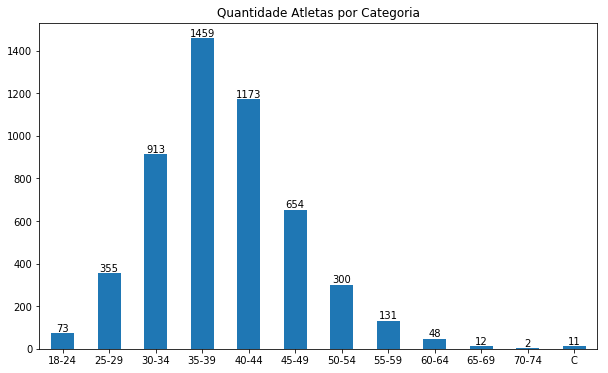

In [0]:
#categorias_excluidas = ['C','PRO']
#categorias = resultados[~resultados.isin(categorias_excluidas)] 
categorias = resultados
hist = categorias['Categ'].value_counts().sort_index(ascending=True).plot.bar(rot=0, title="Quantidade Atletas por Categoria", figsize=(10,6) )

rects = hist.patches

# Make labels
labels = [ i for i in categorias['Categ'].value_counts().sort_index(ascending=True) ]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    hist.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom')

hist.patch.set_facecolor('#FFFFFF')

In [0]:
resultados.loc[resultados['Total'] < pd.to_datetime(target + ':00:00', format= '%H:%M:%S'), 'Abaixo' + target] = 'Abaixo ' + target + ' horas' 
resultados.loc[resultados['Total'] >= pd.to_datetime(target + ':00:00', format= '%H:%M:%S'), 'Abaixo' + target] = 'Acima ' + target + ' horas' 

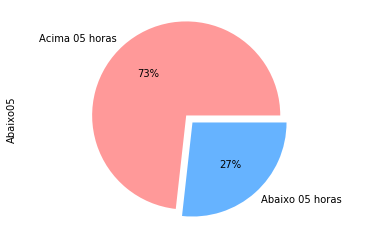

In [0]:
resultados['Abaixo' + target].value_counts().plot.pie(title='', colors=colors, explode=[0.1, 0], autopct='%1.0f%%').axis('equal');